# **TUGAS K-MEANS DISTANCES**
**247056002 - Plipus Telaumbanua**<p><p>


**METHOD: K-MEANS DISTANCES**
1.	Ecludian Distance
2.	City-Block Distance
3.	Chebychef Distance
4.	Minkowski Distance
5.	Canberra Distance
6.	Bray-Curtis (Sorensen) Distance
7.	Divergensi Kullback Leibler Distance
8.	Divergensi Jensen Shannon Distance

*Magister of Data Science & Artificial Intelligence USU - Copyright@2025 - With All Reserved*

**PROGESS: DONE 100%**

# **1. IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# **2. DATASET**

In [81]:
# URL ke file data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Nama kolom
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"
]

# Load data
df = pd.read_csv(url, names=columns)

# Tampilkan 5 data pertama
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


**1.1 Defenisi Fitur**
## 📊 Penjelasan Fitur pada Dataset Heart Disease - Cleveland

| No | Nama Fitur   | Deskripsi                                                                 | Tipe Data           | Nilai / Kategori                                                 |
|----|--------------|--------------------------------------------------------------------------|---------------------|------------------------------------------------------------------|
| 1  | `age`        | Usia pasien                                                              | Numerik             | Dalam tahun                                                     |
| 2  | `sex`        | Jenis kelamin                                                            | Kategorik (biner)   | 0 = wanita, 1 = pria                                             |
| 3  | `cp`         | Tipe nyeri dada (chest pain type)                                        | Kategorik ordinal   | 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic |
| 4  | `trestbps`   | Tekanan darah saat istirahat (resting blood pressure)                   | Numerik             | Dalam mm Hg                                                     |
| 5  | `chol`       | Kadar kolesterol dalam darah                                             | Numerik             | Dalam mg/dl                                                     |
| 6  | `fbs`        | Gula darah puasa > 120 mg/dl?                                            | Biner               | 1 = ya, 0 = tidak                                               |
| 7  | `restecg`    | Hasil elektrokardiogram istirahat                                        | Kategorik ordinal   | 0 = normal, 1 = ST-T abnormality, 2 = left ventricular hypertrophy |
| 8  | `thalach`    | Detak jantung maksimum yang dicapai saat tes                            | Numerik             | Dalam bpm                                                       |
| 9  | `exang`      | Apakah mengalami angina akibat olahraga?                                | Biner               | 1 = ya, 0 = tidak                                               |
|10  | `oldpeak`    | Depresi segmen ST dibandingkan dengan saat istirahat                    | Numerik             | Hasil EKG                                                       |
|11  | `slope`      | Kemiringan segmen ST saat exercise                                      | Kategorik ordinal   | 1 = upsloping, 2 = flat, 3 = downsloping                        |
|12  | `ca`         | Jumlah pembuluh darah utama yang terlihat melalui fluoroskopi           | Numerik diskrit     | 0 sampai 3 (bisa mengandung nilai hilang '?')                   |
|13  | `thal`       | Hasil uji thalassemia                                                    | Kategorik ordinal   | 3 = normal, 6 = fixed defect, 7 = reversible defect              |
|14  | `num`        | Target: Tingkat penyakit jantung                                        | Kategorik ordinal   | 0 = tidak ada penyakit, 1–4 = tingkat keparahan penyakit         |

### ⚠️ Catatan:
- Fitur `num` adalah **target klasifikasi** dan tidak digunakan dalam **unsupervised learning (K-Means)**.
- Fitur `ca` dan `thal` bisa mengandung **missing value** dalam bentuk `'?'`.
- Karena K-Means menggunakan **jarak Euclidean**, semua fitur perlu **distandarisasi** dan bisa diperlakukan sebagai numerik.


# **3. PREPROCESSING**

### 3.1 Data Cleansing

In [82]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# 1. Ganti tanda '?' dengan NaN
df.replace("?", np.nan, inplace=True)

# 2. Ubah semua kolom ke numerik (float), jika tidak bisa otomatis jadi NaN
df = df.apply(pd.to_numeric, errors='coerce')

# 3. Cek jumlah missing value
print("Jumlah missing value tiap kolom:")
print(df.isnull().sum())

# 4. Imputasi missing value dengan median
df.fillna(df.median(numeric_only=True), inplace=True)

# 5. Pisahkan fitur dan target
X = df.drop(columns=["num"])  # fitur
y = df["num"]                 # target (tidak digunakan di KMeans, hanya untuk evaluasi nanti)

# 6. Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Konfirmasi hasil akhir
print("\nShape data hasil preprocessing:", X_scaled.shape)


Jumlah missing value tiap kolom:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Shape data hasil preprocessing: (303, 13)


> **PENJELASAN:**<BR>
> Sebelum melakukan proses clustering menggunakan algoritma K-Means, data harus dipersiapkan dengan benar agar hasil clustering lebih representatif dan akurat. Berikut ini adalah langkah-langkah preprocessing yang dilakukan:
1. **Mengganti tanda tanya (`?`) dengan NaN (missing value)**  
   Dataset ini mengandung nilai hilang yang ditandai dengan tanda `?`. Nilai tersebut harus dikonversi menjadi `NaN` agar bisa diproses lebih lanjut.
2. **Mengubah seluruh kolom menjadi tipe numerik (float)**  
   Setelah konversi, jika ada nilai yang tidak bisa diubah menjadi numerik akan secara otomatis menjadi `NaN`.
3. **Menangani Missing Value**  
   Semua missing value diimputasi menggunakan nilai **median** dari masing-masing kolom. Metode median dipilih karena lebih robust terhadap outlier.
4. **Memisahkan Fitur dan Target**  
   Kolom `num` (tingkat penyakit jantung) dipisahkan karena tidak digunakan dalam proses unsupervised learning (K-Means). Fitur disimpan dalam variabel `X`, dan target `y` hanya disimpan untuk evaluasi nanti.
5. **Standarisasi Fitur**  
   Semua fitur pada dataset memiliki satuan dan skala yang berbeda-beda. Oleh karena itu, dilakukan standarisasi menggunakan `StandardScaler` agar semua fitur memiliki distribusi deng


### 3.2 Feature Selection

In [83]:
# ============================
# 🔍 3.2 Feature Selection
# ============================

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=["num"])  # Semua fitur (tanpa label)
y = df["num"]                 # Label target (untuk evaluasi nanti)

# Tampilkan bentuk data fitur dan target
print("Ukuran fitur (X):", X.shape)
print("Ukuran target (y):", y.shape)

Ukuran fitur (X): (303, 13)
Ukuran target (y): (303,)


### 3.3 Feature Transformation

In [84]:
# ============================
# 🔄 3.3 Feature Transformation
# ============================

from sklearn.preprocessing import StandardScaler

# Inisialisasi scaler
scaler = StandardScaler()

# Transformasi fitur
X_scaled = scaler.fit_transform(X)

# Konfirmasi hasil
print("Shape data setelah distandarisasi:", X_scaled.shape)


Shape data setelah distandarisasi: (303, 13)


# **4. EXPLORATORY DATA ANALYSIS (EDA)**

### 4.1 Feature Correlations

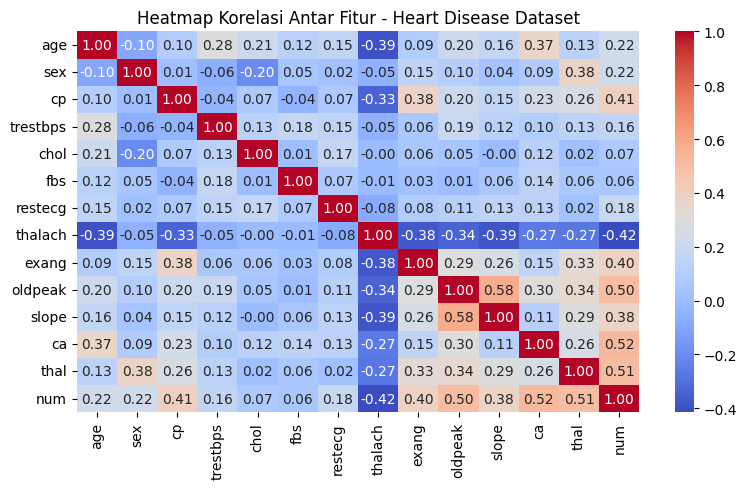

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tambahkan kembali target untuk analisis korelasi
df_features = X.copy()
df_features["num"] = y

# 1. Heatmap Korelasi
plt.figure(figsize=(8, 5))
sns.heatmap(df_features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Fitur - Heart Disease Dataset")
plt.tight_layout()
plt.show()

> **Interprestasi:**
Heatmap korelasi digunakan untuk mengetahui sejauh mana hubungan antar fitur dan terhadap target `num` (tingkat penyakit jantung). Interpretasi berikut disusun berdasarkan nilai korelasi Pearson antar fitur:
1. **Tidak ada multikolinearitas kuat**  
   Semua fitur memiliki korelasi < 0.9 satu sama lain, sehingga tidak perlu ada fitur yang dihapus karena redundansi.
2. **Fitur dengan korelasi positif tertinggi terhadap `num`**  
   - `ca` (jumlah pembuluh darah terlihat): **+0.52**  
   - `thal` (hasil uji thalassemia): **+0.51**  
   - `oldpeak` (depresi ST): **+0.50**  
   - `cp` (chest pain): **+0.41**  
   - `exang` (angina akibat olahraga): **+0.40**
3. **Fitur dengan korelasi negatif terhadap `num`**  
   - `thalach` (detak jantung maksimal): **−0.42**  
   - `age` (usia): **−0.22**  
   Korelasi negatif ini menunjukkan bahwa semakin rendah `thalach` dan semakin tua `age`, maka risiko penyakit jantung cenderung meningkat.
4. **Implikasi untuk Clustering**  
   - Fitur-fitur dengan korelasi tinggi terhadap `num` memiliki potensi besar dalam membantu K-Means memisahkan klaster yang bermakna.
   - Seluruh fitur tetap digunakan karena tidak ada yang terlalu mirip atau tidak relevan.


### 4.2 Data Distributions

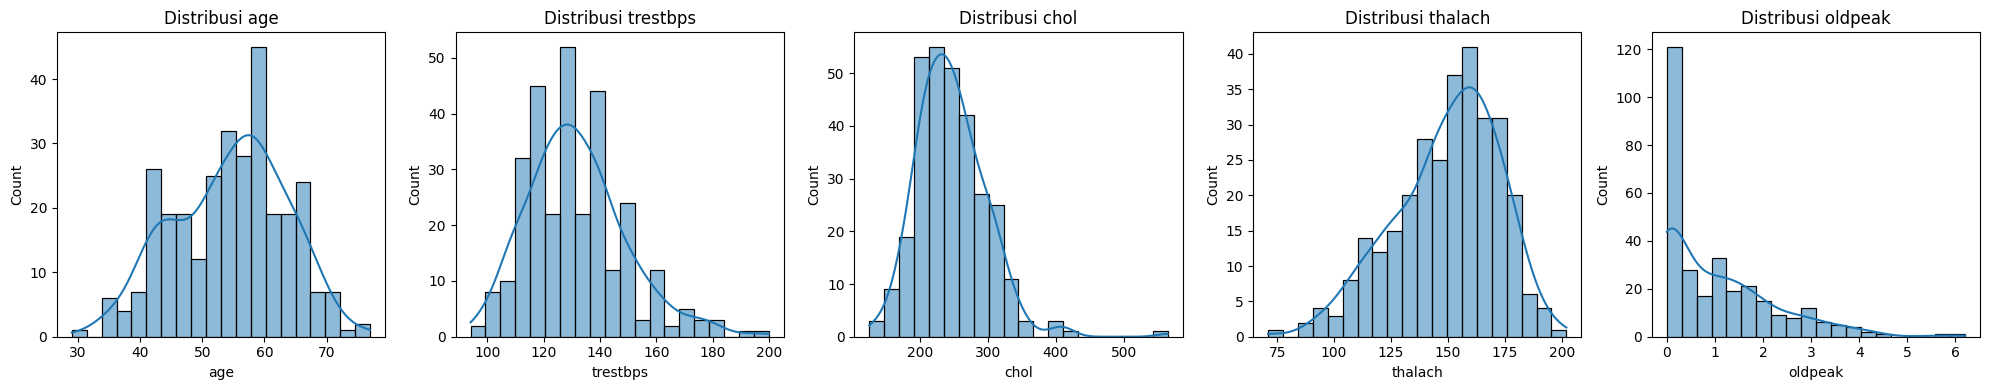

In [86]:
# 2. Distribusi beberapa fitur utama
plt.figure(figsize=(20, 4))  # Ukuran lebar, tinggi kecil

fitur_utama = ["age", "trestbps", "chol", "thalach", "oldpeak"]

for i, col in enumerate(fitur_utama):
    plt.subplot(1, 5, i + 1)  # 1 baris, 5 kolom
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

> Visualisasi distribusi lima fitur numerik utama menunjukkan pola sebaran data sebagai berikut:
1. **age**: Terdistribusi normal dengan sedikit skew ke kanan. Mayoritas pasien berusia 50–60 tahun.
2. **trestbps** (tekanan darah): Distribusi cenderung normal tetapi ada nilai tinggi (>180) yang bisa dianggap outlier.
3. **chol** (kolesterol): Skew ke kanan dengan beberapa nilai ekstrem di atas 400–500, menandakan adanya outlier.
4. **thalach** (detak jantung maksimal): Distribusi cukup simetris, menunjukkan sebaran alami tanpa outlier ekstrem.
5. **oldpeak** (depresi ST): Distribusi sangat skew ke kanan. Sebagian besar pasien memiliki nilai rendah, namun terdapat outlier > 4.

> **Kesimpulan:**
- Beberapa fitur seperti `chol` dan `oldpeak` memiliki outlier yang perlu diperhatikan.
- Distribusi fitur sudah cukup baik untuk digunakan dalam clustering setelah standarisasi.

### 4.3 Outliers

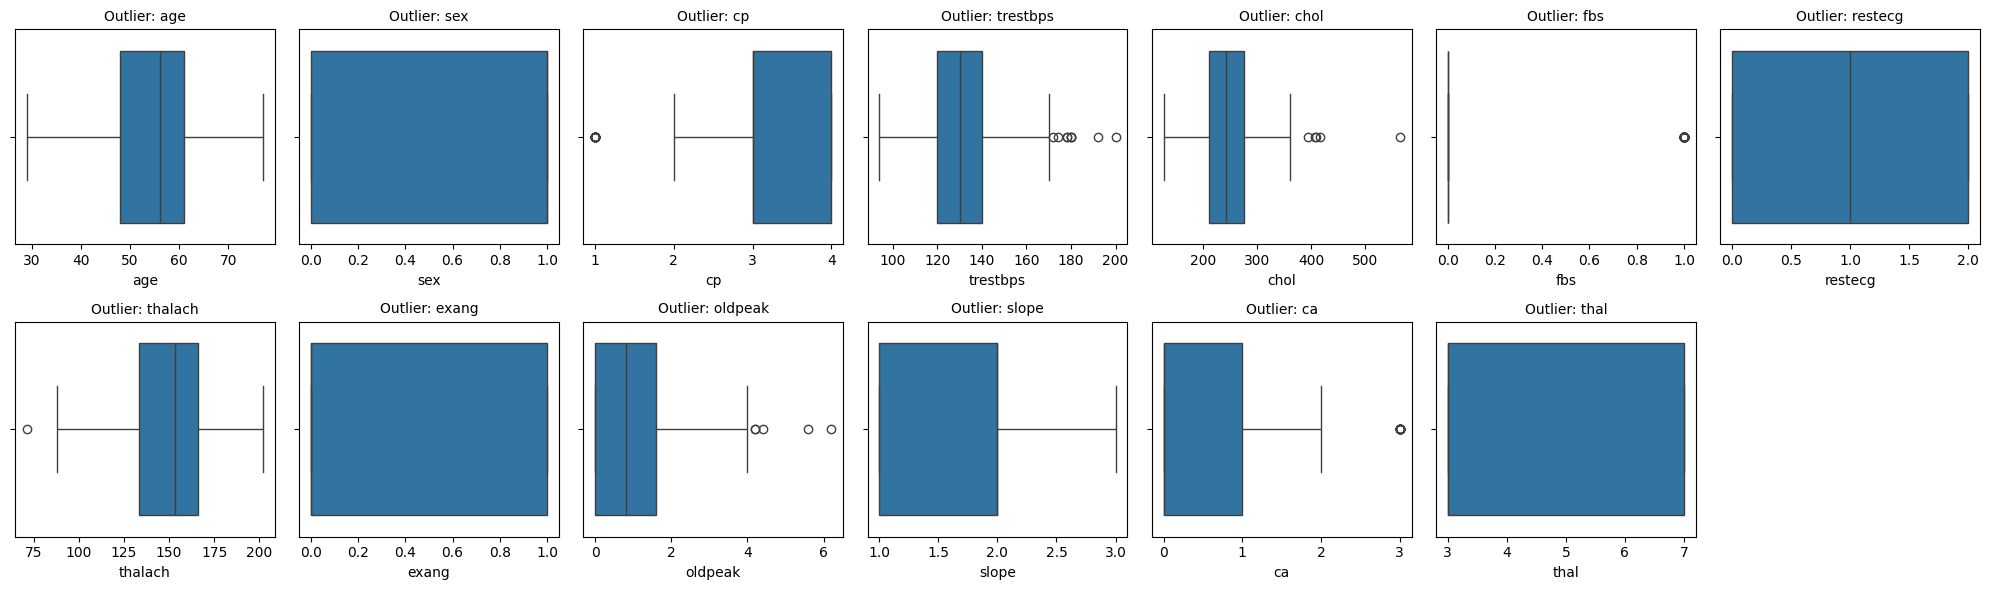

In [87]:
# Deteksi Outlier dengan Boxplot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(20, 6))

for i, col in enumerate(X.columns):
    plt.subplot(2, int(np.ceil(len(X.columns)/2)), i+1)
    sns.boxplot(x=X[col])
    plt.title(f"Outlier: {col}", fontsize=10)
    plt.xlabel(col)

plt.tight_layout()
plt.show()


> **Iterprestasi**
Outlier adalah nilai-nilai ekstrem yang berbeda jauh dari distribusi mayoritas data. Dalam konteks K-Means, outlier dapat memengaruhi posisi centroid karena K-Means menggunakan rata-rata sebagai pusat klaster.
Beberapa temuan dari hasil boxplot:
- Fitur `chol`, `oldpeak`, dan `trestbps` menunjukkan nilai-nilai tinggi di sisi kanan (upper whisker), menandakan keberadaan outlier.
- `thalach` dan `age` memiliki distribusi yang relatif simetris, dengan sedikit atau tanpa outlier mencolok.
- Fitur-fitur seperti `ca` dan `thal` menunjukkan outlier karena banyak mengandung nilai diskrit dan loncatan antar nilai cukup besar.
Dalam proyek ini, outlier tidak dihapus karena:
- Ukuran dataset terbatas
- Outlier dapat mencerminkan kondisi medis nyata (bukan kesalahan input)
- Dataset sudah dinormalisasi, sehingga dampak outlier terhadap jarak relatif berkurang

Kesimpulannya, semua fitur tetap digunakan dalam proses clustering tanpa penghapusan outlier.

# **5. K-MEANS**

# 5.1  Elbow Method dan Silhouette Score

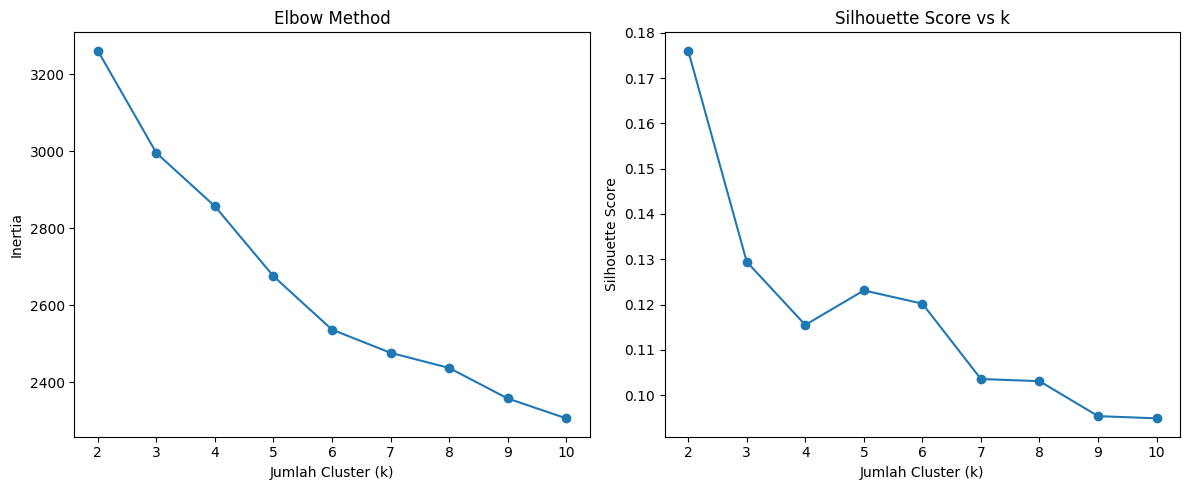

In [88]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette = []
k_values = range(2, 11)  # Coba nilai k dari 2 sampai 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, labels))

# Visualisasi Elbow dan Silhouette
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Elbow Method
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette, marker='o')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs k")

plt.tight_layout()
plt.show()


Untuk menentukan jumlah cluster terbaik dalam K-Means, digunakan dua pendekatan:

1. **Elbow Method**  
   Mengukur nilai inertia (dalam-cluster sum of squares). Titik “tekukan” pada grafik menunjukkan jumlah cluster optimal.

2. **Silhouette Score**  
   Mengukur seberapa baik data dikelompokkan. Nilai mendekati 1 berarti klaster sangat terpisah dengan baik. Nilai tertinggi menunjukkan k terbaik **dalam hal ini k=3**

Dengan membandingkan kedua grafik, kita dapat memilih nilai k yang paling tepat untuk dilanjutkan ke proses clustering.

# **6. K-MEANS DISTANCES**

# 6.1 Ecludian Distances (K=3)

In [93]:
# Fungsi untuk menghitung jarak Euclidean antara satu titik dengan semua centroid
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2, axis=1))


In [94]:
def kmeans_euclidean(X, k, max_iter=100):
    np.random.seed(42)
    centroids = X[np.random.choice(len(X), k, replace=False)]

    for iteration in range(max_iter):
        clusters = []

        # Assign tiap data ke centroid terdekat (dengan jarak Euclidean)
        for x in X:
            distances = [np.sqrt(np.sum((x - c)**2)) for c in centroids]
            cluster_idx = np.argmin(distances)
            clusters.append(cluster_idx)

        clusters = np.array(clusters)

        # Update centroid: mean dari masing-masing cluster (karena Euclidean optimal dengan mean)
        new_centroids = []
        for i in range(k):
            if np.any(clusters == i):
                new_centroids.append(np.mean(X[clusters == i], axis=0))
            else:
                new_centroids.append(X[np.random.choice(len(X))])

        new_centroids = np.array(new_centroids)

        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return clusters, centroids


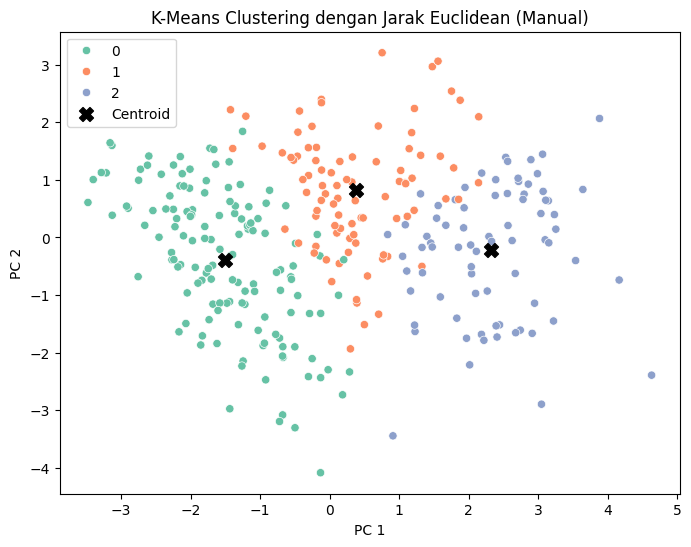

In [97]:
# Jalankan K-Means Euclidean
k = 3
labels_euclidean, centroids_euc = kmeans_euclidean(X_scaled, k)

# Visualisasi hasil clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca_euc = pca.transform(centroids_euc)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_euclidean, palette="Set2", legend="full")
plt.scatter(centroids_pca_euc[:, 0], centroids_pca_euc[:, 1], color='black', s=100, marker='X', label='Centroid')
plt.title("K-Means Clustering dengan Jarak Euclidean (Manual)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.show()


### **ANALYSIS:**

Sebagai pembanding dari versi City-Block, algoritma K-Means diimplementasikan secara manual menggunakan jarak Euclidean.

Langkah-langkah:
- Fungsi `euclidean_distance()` digunakan untuk menghitung jarak antar data dan centroid berdasarkan rumus akar kuadrat selisih kuadrat fitur
- Proses clustering dilakukan dalam fungsi `kmeans_euclidean()`:
  - Centroid diinisialisasi secara acak
  - Data dikelompokkan ke centroid terdekat
  - Centroid diperbarui sebagai **mean** dari anggota cluster
- Hasil clustering divisualisasikan menggunakan PCA 2 dimensi

Pendekatan ini membantu membandingkan secara langsung performa algoritma K-Means berdasarkan dua jenis metrik jarak berbeda: City-Block vs Euclidean.

# 6.2  Jarak City-Block

In [36]:
# Fungsi hitung jarak City-Block antar dua titik
def cityblock_distance(a, b):
    return np.sum(np.abs(a - b), axis=1)


In [35]:
def kmeans_cityblock(X, k, max_iter=100):
    np.random.seed(42)
    # Inisialisasi centroid awal (acak dari data)
    centroids = X[np.random.choice(len(X), k, replace=False)]

    for iteration in range(max_iter):
        clusters = []

        # Assign tiap data ke centroid terdekat (berdasarkan cityblock)
        for x in X:
            distances = [np.sum(np.abs(x - c)) for c in centroids]
            cluster_idx = np.argmin(distances)
            clusters.append(cluster_idx)

        clusters = np.array(clusters)

        # Update centroid: median dari tiap cluster (karena cityblock sensitif ke mean)
        new_centroids = []
        for i in range(k):
            if np.any(clusters == i):
                new_centroids.append(np.median(X[clusters == i], axis=0))
            else:
                # Jika cluster kosong, pilih centroid baru secara acak
                new_centroids.append(X[np.random.choice(len(X))])

        new_centroids = np.array(new_centroids)

        # Cek konvergensi
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return clusters, centroids


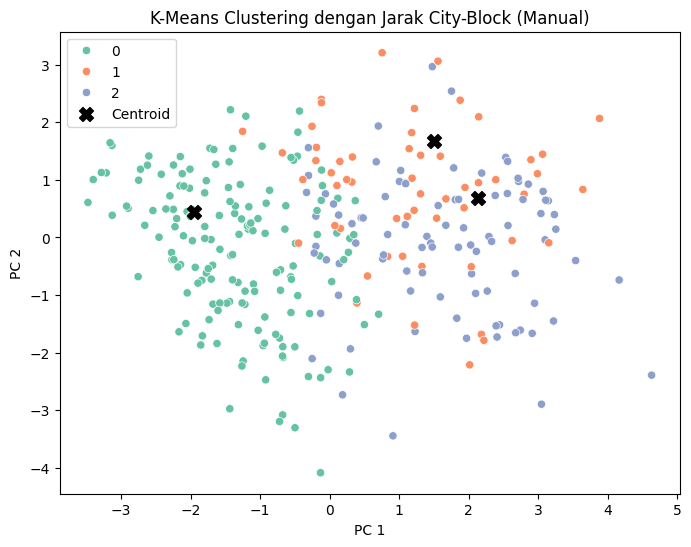

In [37]:
# Jalankan K-Means City-Block
k = 3
labels_cityblock, centroids_cb = kmeans_cityblock(X_scaled, k)

# Visualisasi hasil clustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(centroids_cb)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_cityblock, palette="Set2", legend="full")
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], color='black', s=100, marker='X', label='Centroid')
plt.title("K-Means Clustering dengan Jarak City-Block (Manual)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.show()


### **ANALYSIS:**
Untuk membandingkan pengaruh metrik jarak, K-Means diimplementasikan secara manual dengan jarak City-Block (Manhattan).

Langkah-langkah:
- Fungsi `cityblock_distance()` digunakan untuk menghitung jarak absolut antar data dan centroid
- Proses clustering dilakukan dalam fungsi `kmeans_cityblock()` yang:
  - Menginisialisasi centroid secara acak
  - Mengelompokkan data berdasarkan jarak City-Block
  - Memperbarui centroid sebagai median dari setiap cluster
- Visualisasi dilakukan dengan PCA untuk menampilkan hasil akhir clustering dalam bentuk 2 dimensi

Dengan pendekatan ini, kita dapat melakukan eksperimen dan evaluasi secara fleksibel terhadap performa algoritma dengan jenis jarak selain Euclidean.

# 6.3 Chebyshev

In [41]:
# Fungsi jarak Chebyshev antara satu titik dan semua centroid
def chebyshev_distance(a, b):
    return np.max(np.abs(a - b), axis=1)

def kmeans_chebyshev(X, k, max_iter=100):
    np.random.seed(42)
    centroids = X[np.random.choice(len(X), k, replace=False)]

    for iteration in range(max_iter):
        clusters = []

        # Assign tiap data ke centroid dengan jarak Chebyshev minimum
        for x in X:
            distances = [np.max(np.abs(x - c)) for c in centroids]
            cluster_idx = np.argmin(distances)
            clusters.append(cluster_idx)

        clusters = np.array(clusters)

        # Update centroid: gunakan median agar stabil terhadap outlier
        new_centroids = []
        for i in range(k):
            if np.any(clusters == i):
                new_centroids.append(np.median(X[clusters == i], axis=0))
            else:
                new_centroids.append(X[np.random.choice(len(X))])

        new_centroids = np.array(new_centroids)

        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return clusters, centroids


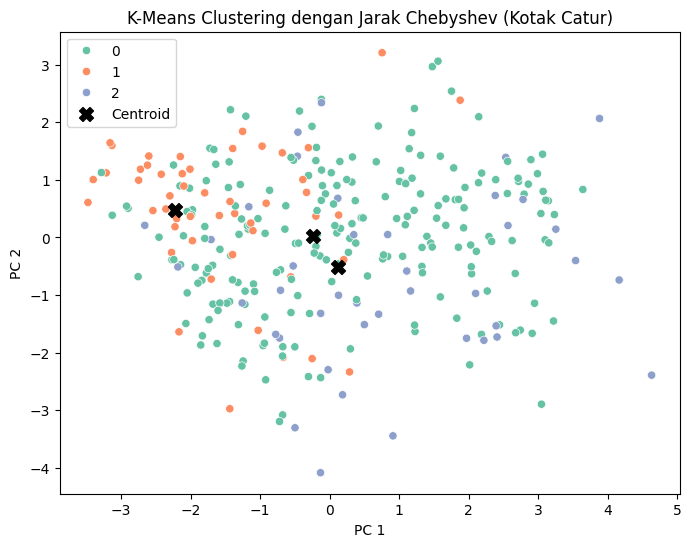

In [42]:
# Jalankan K-Means dengan Chebyshev Distance
k = 3
labels_cheby, centroids_cheby = kmeans_chebyshev(X_scaled, k)

# Visualisasi PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca_cheby = pca.transform(centroids_cheby)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_cheby, palette="Set2", legend="full")
plt.scatter(centroids_pca_cheby[:, 0], centroids_pca_cheby[:, 1], color='black', s=100, marker='X', label='Centroid')
plt.title("K-Means Clustering dengan Jarak Chebyshev (Kotak Catur)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.show()


### **ANALYSIS:**

Jarak Chebyshev menghitung perbedaan maksimum antar fitur dan sering disebut sebagai jarak "kotak catur". Ini cocok digunakan saat satu fitur dominan bisa menjadi penentu utama kedekatan antar titik.

Langkah-langkah:
- Fungsi `chebyshev_distance()` digunakan untuk mengukur jarak antar data dan centroid
- Proses clustering dilakukan menggunakan fungsi `kmeans_chebyshev()`:
  - Centroid diinisialisasi secara acak
  - Data dikelompokkan berdasarkan jarak Chebyshev terdekat
  - Centroid diperbarui dengan median (karena Chebyshev lebih stabil terhadap outlier daripada mean)
- Visualisasi akhir menggunakan PCA agar hasil clustering bisa divisualisasikan dalam 2 dimensi

Eksperimen ini memberi gambaran bagaimana pemilihan metrik jarak memengaruhi struktur cluster yang terbentuk.

# 6.4 Minkowski Distance

In [43]:
def minkowski_distance(a, b, p=3):
    return np.power(np.sum(np.abs(a - b) ** p, axis=1), 1/p)

def kmeans_minkowski(X, k, p=3, max_iter=100):
    np.random.seed(42)
    centroids = X[np.random.choice(len(X), k, replace=False)]

    for iteration in range(max_iter):
        clusters = []

        # Assign berdasarkan jarak Minkowski
        for x in X:
            distances = [np.power(np.sum(np.abs(x - c)**p), 1/p) for c in centroids]
            cluster_idx = np.argmin(distances)
            clusters.append(cluster_idx)

        clusters = np.array(clusters)

        # Update centroid: gunakan mean (masih umum untuk Minkowski)
        new_centroids = []
        for i in range(k):
            if np.any(clusters == i):
                new_centroids.append(np.mean(X[clusters == i], axis=0))
            else:
                new_centroids.append(X[np.random.choice(len(X))])

        new_centroids = np.array(new_centroids)

        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return clusters, centroids


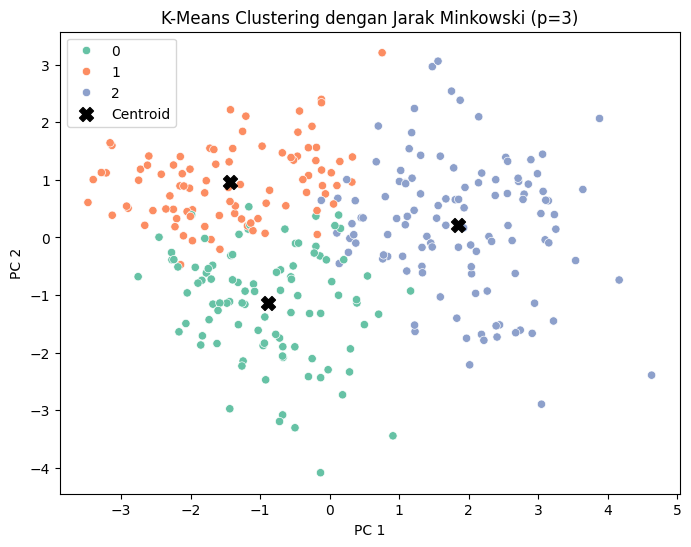

In [44]:
# Jalankan K-Means Minkowski (misal p=3)
k = 3
labels_minkowski, centroids_mink = kmeans_minkowski(X_scaled, k, p=3)

# PCA Visualisasi
X_pca = PCA(n_components=2).fit_transform(X_scaled)
centroids_pca_mink = PCA(n_components=2).fit(X_scaled).transform(centroids_mink)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_minkowski, palette="Set2", legend="full")
plt.scatter(centroids_pca_mink[:, 0], centroids_pca_mink[:, 1], color='black', s=100, marker='X', label='Centroid')
plt.title("K-Means Clustering dengan Jarak Minkowski (p=3)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.show()


### **ANALYSIS:**

Jarak Minkowski merupakan generalisasi dari Euclidean (p=2) dan City-Block (p=1). Nilai `p` dapat diatur untuk menyesuaikan sensitivitas terhadap variasi fitur.

Langkah-langkah:
- Digunakan fungsi `minkowski_distance()` untuk menghitung jarak antar data dan centroid dengan parameter `p`
- Proses clustering dilakukan dalam fungsi `kmeans_minkowski()`
- Centroid diperbarui dengan rata-rata (mean)
- Visualisasi hasil dilakukan dalam ruang PCA 2 dimensi

Pemilihan nilai `p` memberikan fleksibilitas untuk mengontrol tingkat penalti terhadap perbedaan antar fitur.

Misalnya:
- p=1 → sama dengan City-Block
- p=2 → sama dengan Euclidean
- p=3 → lebih sensitif terhadap perbedaan besar antar fitur

Eksperimen ini melengkapi eksplorasi metrik jarak dalam K-Means manual.

# 6.4 Canberra Distance

In [51]:
def canberra_distance(a, b):
    a = np.array(a)
    b = np.atleast_2d(b)  # pastikan b punya shape (n, d)
    return np.sum(np.abs(a - b) / (np.abs(a) + np.abs(b) + 1e-8), axis=1)

def kmeans_canberra(X, k, max_iter=100):
    np.random.seed(42)
    centroids = X[np.random.choice(len(X), k, replace=False)]

    for iteration in range(max_iter):
        clusters = []

        for x in X:
            distances = [canberra_distance(x, c) for c in centroids]
            cluster_idx = np.argmin(distances)
            clusters.append(cluster_idx)

        clusters = np.array(clusters)

        new_centroids = []
        for i in range(k):
            if np.any(clusters == i):
                new_centroids.append(np.mean(X[clusters == i], axis=0))
            else:
                new_centroids.append(X[np.random.choice(len(X))])

        new_centroids = np.array(new_centroids)

        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return clusters, centroids


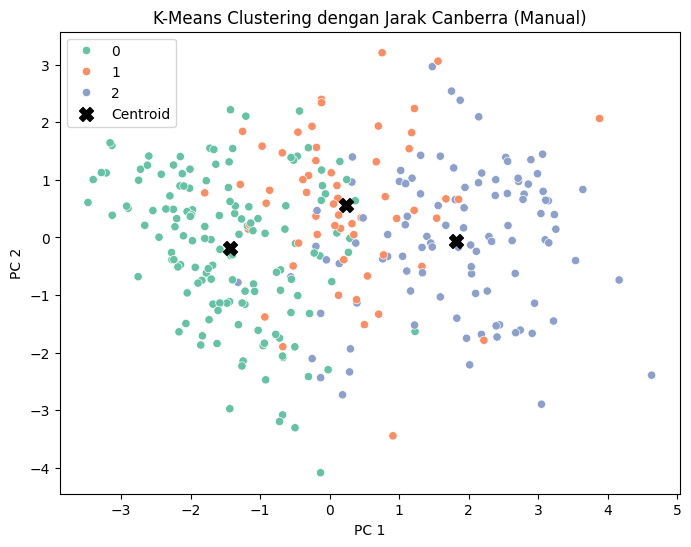

In [52]:
# Jalankan K-Means dengan Canberra Distance
k = 3
labels_canberra, centroids_canberra = kmeans_canberra(X_scaled, k)

# Visualisasi dengan PCA
X_pca = PCA(n_components=2).fit_transform(X_scaled)
centroids_pca_canb = PCA(n_components=2).fit(X_scaled).transform(centroids_canberra)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_canberra, palette="Set2", legend="full")
plt.scatter(centroids_pca_canb[:, 0], centroids_pca_canb[:, 1], color='black', s=100, marker='X', label='Centroid')
plt.title("K-Means Clustering dengan Jarak Canberra (Manual)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.show()


# 6.5	Bray-Curtis (Sorensen) Distance

In [54]:
def bray_curtis_distance(a, b):
    a = np.array(a)
    b = np.atleast_2d(b)
    numerator = np.sum(np.abs(a - b), axis=1)
    denominator = np.sum(np.abs(a + b), axis=1) + 1e-8  # Hindari pembagian 0
    return numerator / denominator


In [55]:
def kmeans_bray_curtis(X, k, max_iter=100):
    np.random.seed(42)
    centroids = X[np.random.choice(len(X), k, replace=False)]

    for iteration in range(max_iter):
        clusters = []

        for x in X:
            distances = [bray_curtis_distance(x, c) for c in centroids]
            cluster_idx = np.argmin(distances)
            clusters.append(cluster_idx)

        clusters = np.array(clusters)

        new_centroids = []
        for i in range(k):
            if np.any(clusters == i):
                new_centroids.append(np.mean(X[clusters == i], axis=0))
            else:
                new_centroids.append(X[np.random.choice(len(X))])

        new_centroids = np.array(new_centroids)

        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return clusters, centroids


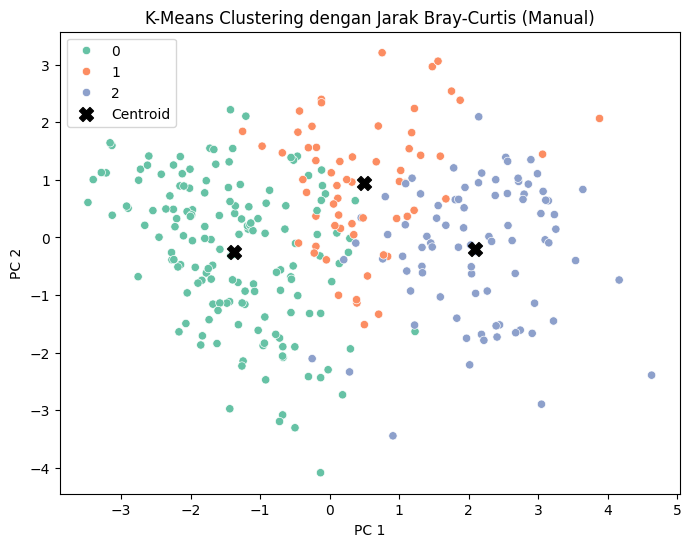

In [56]:
# Jalankan K-Means Bray-Curtis
k = 3
labels_bray, centroids_bray = kmeans_bray_curtis(X_scaled, k)

# Visualisasi PCA
X_pca = PCA(n_components=2).fit_transform(X_scaled)
centroids_pca_bray = PCA(n_components=2).fit(X_scaled).transform(centroids_bray)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_bray, palette="Set2", legend="full")
plt.scatter(centroids_pca_bray[:, 0], centroids_pca_bray[:, 1], color='black', s=100, marker='X', label='Centroid')
plt.title("K-Means Clustering dengan Jarak Bray-Curtis (Manual)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.show()


# 6.6	Divergensi Kullback Leibler Distance

In [69]:
# Normalisasi ke distribusi probabilitas (tiap baris)
def normalize_rows(X):
    X = np.abs(X) + 1e-8  # agar semua nilai positif
    row_sums = np.sum(X, axis=1, keepdims=True)
    return X / row_sums

X_prob = normalize_rows(X_scaled)  # gunakan ini khusus untuk KL


In [58]:
def kl_divergence(p, q):
    p = np.array(p)
    q = np.atleast_2d(q)
    p = p + 1e-8
    q = q + 1e-8
    return np.sum(p * np.log(p / q), axis=1)


In [61]:
def kmeans_kl(X, k, max_iter=100):
    np.random.seed(42)
    centroids = X[np.random.choice(len(X), k, replace=False)]

    for iteration in range(max_iter):
        clusters = []

        for x in X:
            distances = [kl_divergence(x, c) for c in centroids]
            cluster_idx = np.argmin(distances)
            clusters.append(cluster_idx)

        clusters = np.array(clusters)

        new_centroids = []
        for i in range(k):
            if np.any(clusters == i):
                mean = np.mean(X[clusters == i], axis=0)
                mean = mean + 1e-8
                mean = mean / np.sum(mean)  # tetap sebagai distribusi
                new_centroids.append(mean)
            else:
                new_centroids.append(X[np.random.choice(len(X))])

        new_centroids = np.array(new_centroids)

        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return clusters, centroids


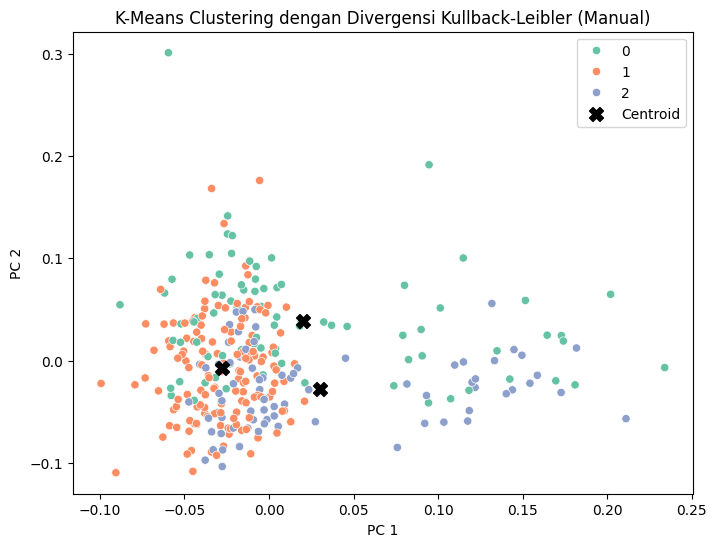

In [63]:
# Jalankan KMeans KL Divergence
k = 3
labels_kl, centroids_kl = kmeans_kl(X_prob, k)

# Visualisasi PCA
X_pca = PCA(n_components=2).fit_transform(X_prob)
centroids_pca_kl = PCA(n_components=2).fit(X_prob).transform(centroids_kl)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_kl, palette="Set2", legend="full")
plt.scatter(centroids_pca_kl[:, 0], centroids_pca_kl[:, 1], color='black', s=100, marker='X', label='Centroid')
plt.title("K-Means Clustering dengan Divergensi Kullback-Leibler (Manual)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.show()


# 6.7	Divergensi Jensen Shannon Distance

In [70]:
def jensen_shannon_distance(p, q):
    p = np.array(p)
    q = np.atleast_2d(q)

    p = p + 1e-8
    q = q + 1e-8

    p = p / np.sum(p)
    q = q / np.sum(q)

    m = 0.5 * (p + q)
    return np.sqrt(0.5 * np.sum(p * np.log(p / m), axis=1) + 0.5 * np.sum(q * np.log(q / m), axis=1))


In [71]:
def kmeans_jsd(X, k, max_iter=100):
    np.random.seed(42)
    centroids = X[np.random.choice(len(X), k, replace=False)]

    for iteration in range(max_iter):
        clusters = []

        for x in X:
            distances = [jensen_shannon_distance(x, c) for c in centroids]
            cluster_idx = np.argmin(distances)
            clusters.append(cluster_idx)

        clusters = np.array(clusters)

        new_centroids = []
        for i in range(k):
            if np.any(clusters == i):
                mean = np.mean(X[clusters == i], axis=0)
                mean = mean + 1e-8
                mean = mean / np.sum(mean)  # distribusi tetap valid
                new_centroids.append(mean)
            else:
                new_centroids.append(X[np.random.choice(len(X))])

        new_centroids = np.array(new_centroids)

        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return clusters, centroids


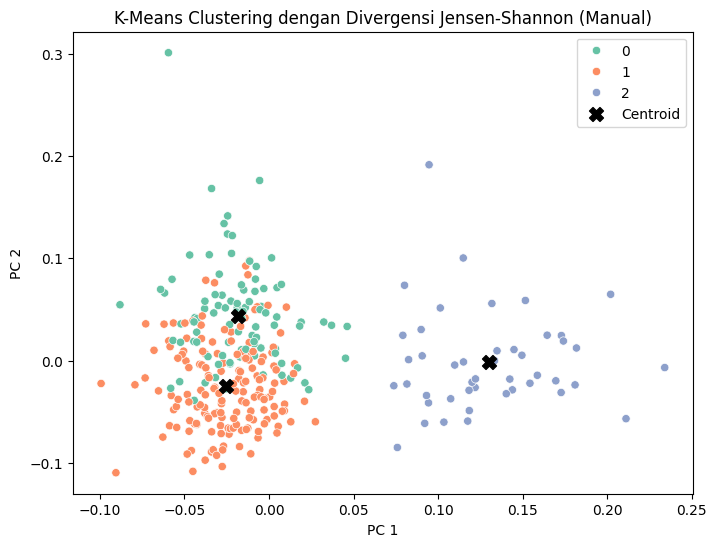

In [73]:
# Gunakan X_prob yang sudah ternormalisasi
labels_jsd, centroids_jsd = kmeans_jsd(X_prob, k)

# PCA untuk visualisasi
X_pca = PCA(n_components=2).fit_transform(X_prob)
centroids_pca_jsd = PCA(n_components=2).fit(X_prob).transform(centroids_jsd)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_jsd, palette="Set2", legend="full")
plt.scatter(centroids_pca_jsd[:, 0], centroids_pca_jsd[:, 1], color='black', s=100, marker='X', label='Centroid')
plt.title("K-Means Clustering dengan Divergensi Jensen-Shannon (Manual)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.show()
